# Lab 3 - Deep Learning Library in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt 

## Q1
For the following training data, build a linear regression model. Assume w and b are
initialized with 1 and learning parameter is set to 0.001.

x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

Assume learning rate =0.001. Plot the graph of epoch in x axis and loss in y axis.

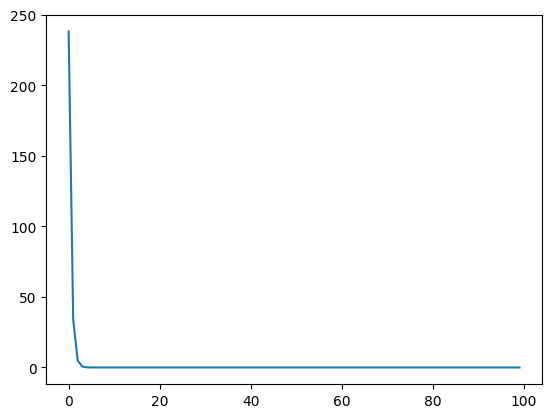

In [2]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

w = torch.tensor(0., requires_grad=True)
b = torch.tensor(0., requires_grad=True)

loss_list = []
lr = torch.tensor(0.001)

for i in range(100):
    loss = torch.tensor(0.)
    for j in range(len(x)):
        a = w*x[j]
        y_hat = a + b
        loss += torch.sum((y_hat - y[j]) ** 2)
    
    loss /= len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    
    w.grad.zero_()
    b.grad.zero_()

plt.plot(loss_list)
plt.show()

## Q2

Find the value of w.grad, b.grad using analytical solution for the given linear regression
problem. Initial value of w = b =1. Learning parameter is set to 0.001. Implement the same
and verify the values of w.grad , b.grad and updated parameter values for two epochs.
Consider the difference between predicted and target values of y is defined as (yp-y).

In [3]:
x = torch.tensor([2.0, 4.0])
y = torch.tensor([20.0, 40.0])

def compute_gradients(x, y, w, b):
    yp = w * x + b
    error = yp - y
    dw = (2 / len(x)) * torch.sum(error * x)
    db = (2 / len(x)) * torch.sum(error)
    return dw, db

w = torch.tensor(1.0)
b = torch.tensor(1.0)
lr = torch.tensor(0.001)

dw, db = compute_gradients(x, y, w, b)
print(f"Initial w.grad: {dw}, b.grad: {db}")

for epoch in range(2):
    w -= lr * dw
    b -= lr * db
    dw, db = compute_gradients(x, y, w, b)
    print(f"Epoch {epoch + 1} - Updated w: {w}, b: {b}, w.grad: {dw}, b.grad: {db}")

Initial w.grad: -174.0, b.grad: -52.0
Epoch 1 - Updated w: 1.1740000247955322, b: 1.0520000457763672, w.grad: -170.20799255371094, b.grad: -50.85199737548828
Epoch 2 - Updated w: 1.344208002090454, b: 1.1028521060943604, w.grad: -166.4987335205078, b.grad: -49.72904968261719


## Q3

Revise the linear regression model by defining a user defined class titled RegressionModel
with two parameters w and b as its member variables. Define a constructor to initialize w
and b with value 1. Define four member functions namely forward(x) to implement wx+b,
update() to update w and b values, reset_grad() to reset parameters to zero, criterion(y, yp)
to implement MSE Loss given the predicted y value yp and the target label y. Define an
object of this class named model and invoke all the methods. Plot the graph of epoch vs
loss by varying epoch to 100 iterations.

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])

y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

learning_rate = torch.tensor(0.001)

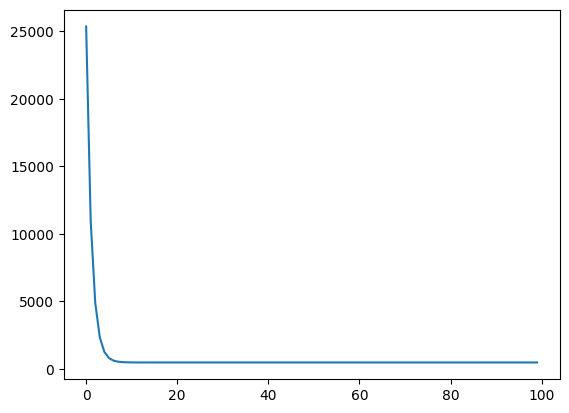

In [4]:
class RegressionModel:
    def __init__(self):
        self.w = torch.tensor(1.0, requires_grad=True)
        self.b = torch.tensor(1.0, requires_grad=True)

    def forward(self, x):
        return self.w * x + self.b

    def update(self, learning_rate):
        self.w.data -= learning_rate * self.w.grad.data
        self.b.data -= learning_rate * self.b.grad.data

    def reset_grad(self):
        self.w.grad = None
        self.b.grad = None

    def criterion(self, y, yp):
        return ((y - yp) ** 2).mean()

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = 0.001

model = RegressionModel()
loss_list = []

for epoch in range(100):
    yp = model.forward(x)
    loss = model.criterion(y, yp)
    loss_list.append(loss.item())

    loss.backward()

    model.update(learning_rate)
    model.reset_grad()

plt.plot(loss_list)
plt.show()

## Q4

Convert your program written in Qn 3 to extend nn.module in your model. Also override
the necessary methods to fit the regression line. Illustrate the use of Dataset and DataLoader
from torch.utils.data in your implementation. Use the SGD Optimizer torch.optim.SGD()

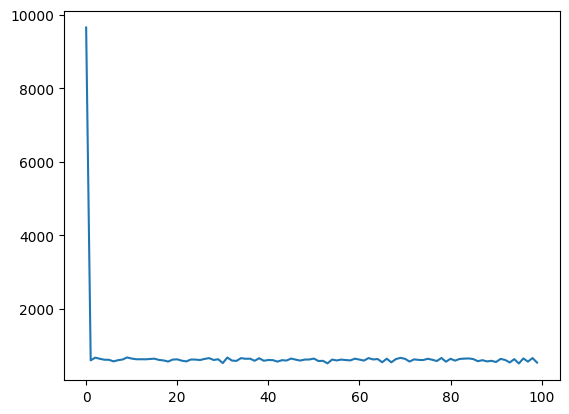

In [5]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class LinearDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.w = nn.Parameter(torch.tensor(1.0))
        self.b = nn.Parameter(torch.tensor(1.0))

    def forward(self, x):
        return self.w * x + self.b

# x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
# y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

dataset = LinearDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

model = RegressionModel()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 100
loss_list = []

for epoch in range(epochs):
    epoch_loss = 0
    for inputs, targets in dataloader:
        yp = model(inputs)
        loss = nn.functional.mse_loss(yp, targets)
        epoch_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_list.append(epoch_loss / len(dataloader))

plt.plot(loss_list)
plt.show()

## Q5

Use PyTorch’s nn.Linear() in your implementation to perform linear regression for the data
provided in Qn. 1. Also plot the graph.

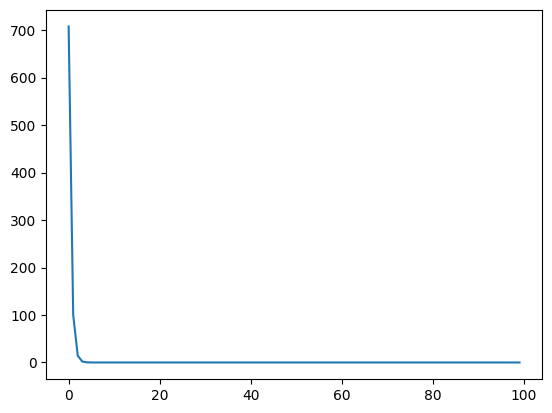

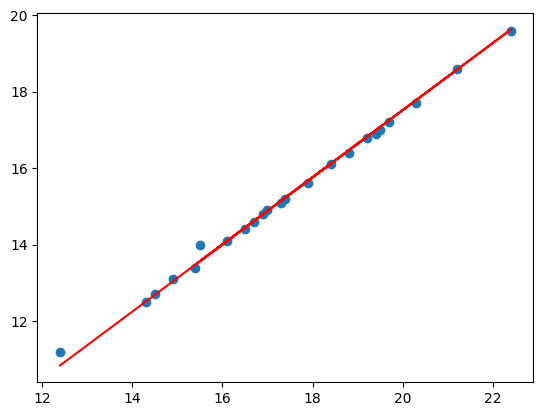

In [6]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2]).view(-1, 1)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6]).view(-1, 1)

model = nn.Linear(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

loss_list = []

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    y_hat = model(x)
    loss = loss_fn(y_hat, y)
    loss.backward()
    optimizer.step()
    
    loss_list.append(loss.item())

plt.plot(loss_list)
plt.show()

with torch.no_grad():
    model.eval()
    predicted = model(x)

plt.scatter(x, y)
plt.plot(x, predicted, color='red')
plt.show()


## Q6

Implement multiple linear regression for the data provided below.
Verify your answer for the data point X1=3, X2=2.

In [7]:
X = torch.tensor([[1.0, 1.0], [2.0, 1.0], [3.0, 1.0], [4.0, 1.0], [5.0, 1.0], [3.0, 2.0], [4.0, 2.0], [5.0, 2.0], [6.0, 2.0], [7.0, 2.0]])
y = torch.tensor([[3.7], [3.5], [2.5], [11.5], [5.7], [2.5], [3.5], [4.5], [5.5], [6.5]])

model = nn.Linear(2, 1)
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

test_input = torch.tensor([[3.0, 2.0]])
predicted_value = model(test_input)
print(f"Predicted value for X1=3, X2=2: {predicted_value.item()}")

Predicted value for X1=3, X2=2: 3.551797866821289


## Q7

Implement logistic regression

x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]

y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

In [9]:
x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)

model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    yp = model(x)
    loss = criterion(yp, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

predictions = model(x).detach().numpy()
print(predictions)

[[0.35261518]
 [0.39187348]
 [0.44292623]
 [0.44292623]
 [0.5989649 ]
 [0.81029093]
 [0.90825397]
 [0.9243273 ]
 [0.97216946]]
